<h1>Introduction</h1>
This is a project for predicting Uber trip price. As usual, the dataset we have is noisy and needs lots of feature engineering, and preprocessing.

Now let's start working on a dataset in the Notebook. The first step is to import the libraries and load data. After that we will take a basic understanding of data like its shape, sample, is there are any NULL values present in the dataset. Understanding the data is an important step for prediction or any machine learning project.

In [1]:
# Import nessesary liberaries
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd
import plotly.express as px

# from plotly.offline import init_notebook_mode
# init_notebook_mode(connected=True)

from matplotlib import rcParams
rcParams['figure.figsize'] = 10,5

from sklearn import ensemble
import warnings
warnings.filterwarnings("ignore")

# Default value of display.max_rows is 10 i.e. at max 10 rows will be printed.
# Set it None to display all rows in the dataframe
pd.set_option("display.max_columns", None)

<h1>1. Load the Data </h1>

In [2]:
uber_df = pd.read_csv("../input/uberdataset/UberDataSet.csv")

<h1>2. Data Assessing</h1>
data assessing is the step in which we evaluate our data.
<h3>In this step:</h3>
<ol>
    <li> We take a quick look inside our data and the columns.</li>
    <li>Check if there are any missing values in the data so that we can handle them.</li>
    <li>Check if there are duplicated values.</li>
</ol>

In [3]:
uber_df.head(5)

,Unnamed: 0,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,12,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,1.543616e+09,22,30,11,2018-11-30 22:13:01,America/New_York,North End,West End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,12.0,1.11,1.0,42.3647,-71.0542,40.13,38.08,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.60,3.38,3.99,1543554000,9.833,42.52,1543600800,31.71,1543658400,40.53,1543611600,28.06,1543658400,cloudy,27.31,1017.16,281,1.00,0,9.833,281.8,1543578867,1543612470,0.79,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
1,13,23f145da-f0c1-4d1f-a184-496bc003a7db,1.544698e+09,10,13,12,2018-12-13 10:50:11,America/New_York,North End,West End,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,16.0,1.11,1.0,42.3647,-71.0542,20.38,20.38,Clear,Partly cloudy throughout the day.,0.0000,0.00,0.66,2.94,3.22,1544738400,9.831,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,clear-night,10.87,1031.51,2,0.03,0,9.831,327.3,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
2,14,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,19,13,12,2018-12-13 19:15:03,America/New_York,North End,West End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.5,1.11,1.0,42.3647,-71.0542,32.85,32.85,Mostly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.56,2.65,3.83,1544738400,9.959,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,partly-cloudy-day,18.66,1033.65,76,0.64,0,9.959,330.8,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
3,15,50ef1165-9d23-416c-a65c-18906207b295,1.545005e+09,23,16,12,2018-12-16 23:55:11,America/New_York,North End,West End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,7.5,1.11,1.0,42.3647,-71.0542,41.29,36.01,Light Rain,Rain throughout the day.,0.0567,0.94,0.86,8.30,8.30,1545015600,4.054,43.83,1544990400,34.25,1545044400,38.38,1544986800,28.30,1545044400,rain,37.56,1012.72,57,1.00,0,4.054,325.3,1544962119,1544994839,0.30,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
4,16,91c4861c-1780-42b0-bca1-bbd64a422cc3,1.544748e+09,0,14,12,2018-12-14 00:40:07,America/New_York,North End,West End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,26.0,1.11,1.0,42.3647,-71.0542,31.25,31.25,Overcast,Partly cloudy throughout the day.,0.0000,0.00,0.64,2.62,3.54,1544738400,10.000,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,cloudy,20.53,1035.06,173,0.91,0,10.000,326.7,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [4]:
uber_df.shape

(385663, 58)

<h4>The dataset has:</h4>
<ul>
    <li>385663 rows</li>
    <li>58 columns (no. of features)</li>
</ul>

In [5]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385663 entries, 0 to 385662
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   385663 non-null  int64  
 1   id                           385663 non-null  object 
 2   timestamp                    385663 non-null  float64
 3   hour                         385663 non-null  int64  
 4   day                          385663 non-null  int64  
 5   month                        385663 non-null  int64  
 6   datetime                     385663 non-null  object 
 7   timezone                     385663 non-null  object 
 8   source                       385663 non-null  object 
 9   destination                  385663 non-null  object 
 10  cab_type                     385663 non-null  object 
 11  product_id                   385663 non-null  object 
 12  name                         385663 non-null  object 
 13 

In [6]:
uber_df['price'].describe()

count    330568.000000
mean         15.795343
std           8.560300
min           4.500000
25%           9.000000
50%          12.500000
75%          21.500000
max          89.500000
Name: price, dtype: float64

In [7]:
# Check for missing values
uber_df.isnull().sum()

Unnamed: 0                         0
id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
w

<h4>The price feature has 55095 missing values</h4>

In [8]:
#Check for unique values in each column
uber_df.nunique()

Unnamed: 0                     385663
id                             385663
timestamp                       32775
hour                               24
day                                17
month                               2
datetime                        30346
timezone                            1
source                             12
destination                        12
cab_type                            1
product_id                          7
name                                7
price                             127
distance                          422
surge_multiplier                    1
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust    

<h4>Since there is only 1 value in columns timezone, cab_type and surge_multiplier, so I will drop them.</h4>

In [9]:
uber_df.name.value_counts()

UberXL       55096
WAV          55096
Black SUV    55096
Black        55095
Taxi         55095
UberX        55094
UberPool     55091
Name: name, dtype: int64

<h4>Notice that the "name" feature represents the type of the service</h4>

In [10]:
uber_df.icon.value_counts()

 cloudy                  121479
 partly-cloudy-night      87782
 partly-cloudy-day        64269
 rain                     58602
 clear-night              33595
 clear-day                14878
 fog                       5058
Name: icon, dtype: int64

<h4>The 'icon' feature represents weather conditions.</h4>

In [11]:
#Check for duplicated values
uber_df.duplicated().sum()

0

In [12]:
uber_df.columns

Index(['Unnamed: 0', 'id', 'timestamp', 'hour', 'day', 'month', 'datetime',
       'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name',
       'price', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'ap

<h1>3. Data Cleaning</h1>
<h3>In this step:</h3>
<ol>
    <li>We need to handle the missing values found in the price column by dropping them.</li>
    <li>Drop all the unnecessary features</li>
    <li>Rename 'name' and 'icon' columns to more meaningful names</li>
</ol>

In [13]:
#Drop missing values
uber_df.dropna(inplace=True)

In [14]:
#Drop unnecessary columns
uber_df = uber_df.reset_index()
uber_df = uber_df.drop(['timezone', 'cab_type', 'surge_multiplier', 'index', 'Unnamed: 0', 'id', 'timestamp', 'datetime', 'product_id', 'short_summary', 'long_summary'], axis=1)
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330568 entries, 0 to 330567
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         330568 non-null  int64  
 1   day                          330568 non-null  int64  
 2   month                        330568 non-null  int64  
 3   source                       330568 non-null  object 
 4   destination                  330568 non-null  object 
 5   name                         330568 non-null  object 
 6   price                        330568 non-null  float64
 7   distance                     330568 non-null  float64
 8   latitude                     330568 non-null  float64
 9   longitude                    330568 non-null  float64
 10  temperature                  330568 non-null  float64
 11  apparentTemperature          330568 non-null  float64
 12  precipIntensity              330568 non-null  float64
 13 

In [15]:
# Rename name and icon columns
uber_df.rename(columns={'name': 'Service_type', 'icon': 'weather_condition'}, inplace=True)

In [16]:
uber_df.head(5)

,hour,day,month,source,destination,Service_type,price,distance,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,weather_condition,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,22,30,11,North End,West End,UberXL,12.0,1.11,42.3647,-71.0542,40.13,38.08,0.0000,0.00,0.60,3.38,3.99,1543554000,9.833,42.52,1543600800,31.71,1543658400,40.53,1543611600,28.06,1543658400,cloudy,27.31,1017.16,281,1.00,0,9.833,281.8,1543578867,1543612470,0.79,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
1,10,13,12,North End,West End,Black,16.0,1.11,42.3647,-71.0542,20.38,20.38,0.0000,0.00,0.66,2.94,3.22,1544738400,9.831,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,clear-night,10.87,1031.51,2,0.03,0,9.831,327.3,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
2,19,13,12,North End,West End,UberX,7.5,1.11,42.3647,-71.0542,32.85,32.85,0.0000,0.00,0.56,2.65,3.83,1544738400,9.959,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,partly-cloudy-day,18.66,1033.65,76,0.64,0,9.959,330.8,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
3,23,16,12,North End,West End,WAV,7.5,1.11,42.3647,-71.0542,41.29,36.01,0.0567,0.94,0.86,8.30,8.30,1545015600,4.054,43.83,1544990400,34.25,1545044400,38.38,1544986800,28.30,1545044400,rain,37.56,1012.72,57,1.00,0,4.054,325.3,1544962119,1544994839,0.30,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
4,0,14,12,North End,West End,Black SUV,26.0,1.11,42.3647,-71.0542,31.25,31.25,0.0000,0.00,0.64,2.62,3.54,1544738400,10.000,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,cloudy,20.53,1035.06,173,0.91,0,10.000,326.7,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [17]:
uber_df.shape

(330568, 48)

<h4>After cleaning the data, now the dataset has:</h4>
<ul>
    <li>330568 rows</li>
    <li>48 columns</li>
</ul>

In [18]:
#Let's save our data
uber_df.to_csv("CleanAndFilteredData.csv")

<h1>4. Perform EDA(Exploratory Data Analysis)</h1>
Exploratory analysis is a process to explore and understand the data and data relationship in a complete depth so that it makes feature engineering and machine learning modeling steps smooth and streamlined for prediction.
<h3>In this step:</h3>
<ul>
    <li>I will visualize the data so that we can understand it in more detail<br>using some plots and graphs</li>
</ul>

<h3>Questions to answer:</h3>
<ul>
    <li>Does the weather condition affect the price?</li>
    <li>Does the temperature affect the price?</li>
    <li>Does the distance affect the price?</li>
    <li>Does the service type affect the price?</li>
    <li>How many trips per month?</li>
    <li>What are days that full of trips in each month?</li>
    <li>Does the weather affect the number of trips?</li>
    <li>Does the temperature affect the number of trips?</li>
</ul>

In [19]:
# Looking for correlation using corr() method, compute the standard correlation coefficient
# Correlation Matrix
corr_matrix = uber_df.corr()
corr_matrix['price'].sort_values(ascending=False)
# Plotting Heatmap
# plt.figure(figsize=(150, 100))
# sns.heatmap(corr_matrix, annot = True)

price                          1.000000
distance                       0.336204
windGust                       0.004777
windSpeed                      0.004251
precipIntensityMax             0.003665
cloudCover                     0.002162
ozone                          0.002018
temperature                    0.001697
precipIntensity                0.001647
precipProbability              0.001535
day                            0.001342
temperatureMin                 0.001237
latitude                       0.000979
hour                           0.000867
dewPoint                       0.000741
apparentTemperature            0.000642
visibility.1                   0.000447
visibility                     0.000447
apparentTemperatureMin        -0.000066
apparentTemperatureMinTime    -0.000112
temperatureMax                -0.000117
temperatureMinTime            -0.000142
windGustTime                  -0.000230
apparentTemperatureLowTime    -0.000232
temperatureLowTime            -0.000234


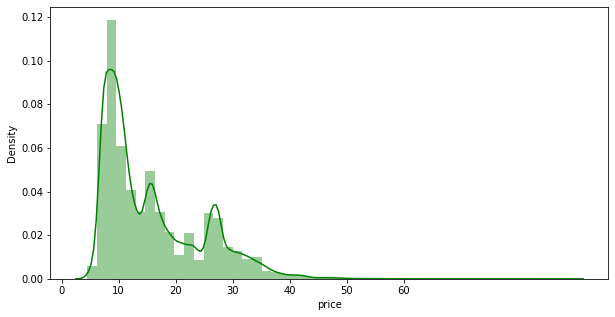

In [20]:
# Distribution of target column
sns.distplot(uber_df['price'], color="green")
plt.xticks(np.arange(0,70,step=10))
plt.show()

<h4>The distribution of the target variable is skewed and it is obvious that most of trips prices are in range 10 to 20</h4>

<h2>Service type and Trip Price 👇</h2>

<AxesSubplot:xlabel='Service_type', ylabel='price'>

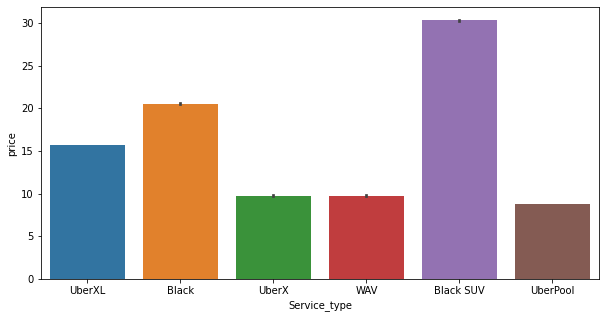

In [21]:
# sns.relplot(x = "price", y = "Service_type", hue ="Service_type", size="price", sizes=(100, 200), palette='Set2' ,data = uber_df)
sns.barplot(x='Service_type', y='price', data=uber_df)
# plt.xticks(rotation="vertical")
# plt.show()

<h4>Black SUV and Black are expensive, and others are in the price range</h4>

<h2>Weather Conditions and Trip Price 👇</h2>
<h3>Does the price vary with weather conditions?</h3>

<AxesSubplot:xlabel='price', ylabel='weather_condition'>

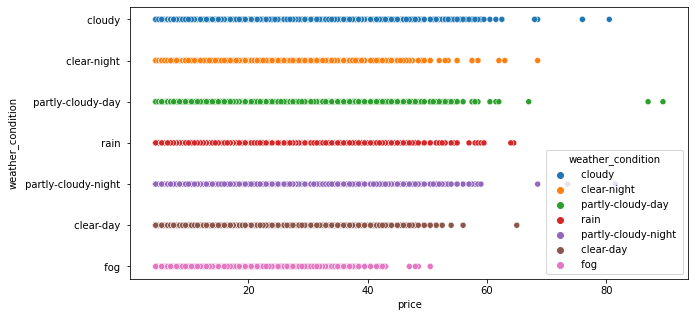

In [22]:
sns.scatterplot(data=uber_df, y="weather_condition", x="price", hue="weather_condition")

It seems that when the weather is cloudy or partly cloudy the price raises. From this plot we can conclude that there is a relationship but not a strong relationship between the price and weather_condition column.

[Text(0.5, 1.0, 'Number of Trips Per Month')]

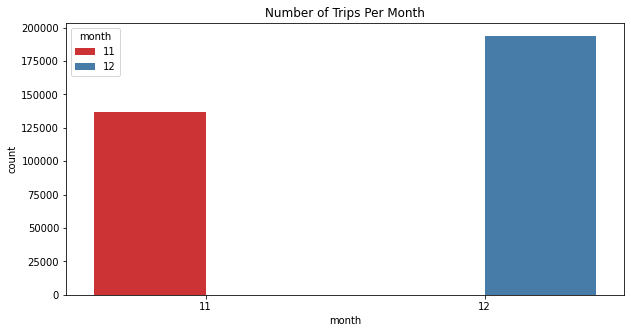

In [23]:
sns.countplot(x="month", hue = "month", palette = "Set1", data=uber_df).set(title='Number of Trips Per Month')

<h4> Number of trips in December is greater than number of trips in Novermber</h4>

In [24]:
pie_df = uber_df.weather_condition.value_counts().reset_index()
pie_df.columns = ['condition', 'count']
# pie_df.head()
fig = px.pie(pie_df, values='count', names='condition', title='The proportion of number of trips in each weather condition', color_discrete_sequence=['#003f5c','#ffa600','#bc5090'], hole=0.2)
fig.show()

* Most of the trips occured in a cloudy weather

<h2>Number of Trips per day in each month 👇</h2>

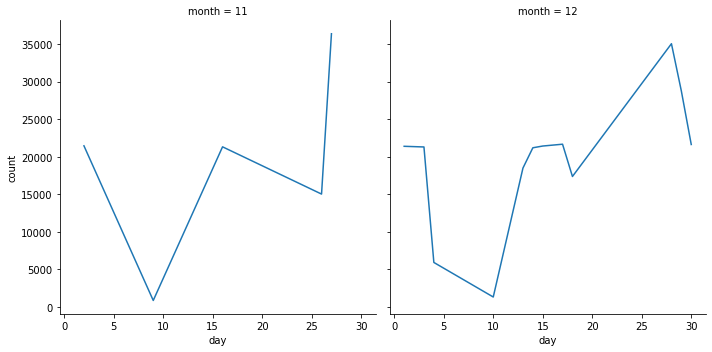

In [25]:
day_df = uber_df['day'].value_counts().reset_index()
day_df.columns = ['day', 'count']
sns.relplot(
    data=day_df, x="day", y="count",
    col=uber_df['month'],
    kind="line"
)

The number of trips in November increases in the last days. However, the number of trips in December increases in the half of the month.

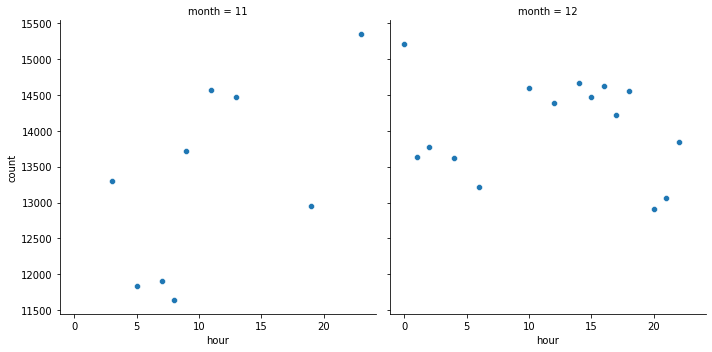

In [26]:
hour_df = uber_df['hour'].value_counts().reset_index()
hour_df.columns = ['hour', 'count']
sns.relplot(
    data=hour_df, x="hour", y="count",
    col=uber_df['month'],
    kind="scatter"
)

The least number of trips are at 8:00 AM. However, The most number of trips are at 11:00 PM.

<h2>Distance and Price 👇</h2>

Text(0.5, 1.0, '\nRelation between Distance & Price\n')

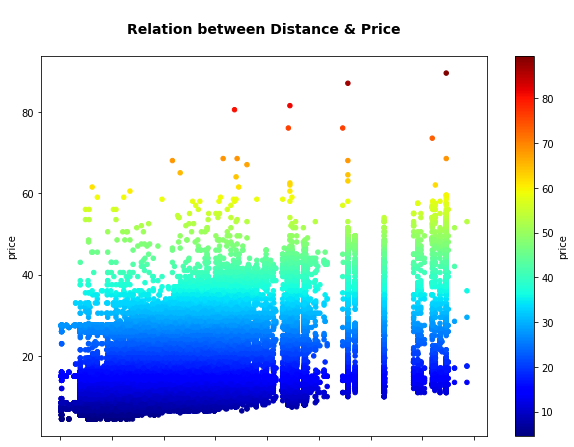

In [27]:
uber_df.plot.scatter(x="distance", y="price", figsize=(10,7), c='price', cmap='jet')
plt.title('\nRelation between Distance & Price\n', fontsize=14, fontweight='bold')

<h2>Temperature and Trip Price 👇</h2>

<AxesSubplot:xlabel='temperature', ylabel='price'>

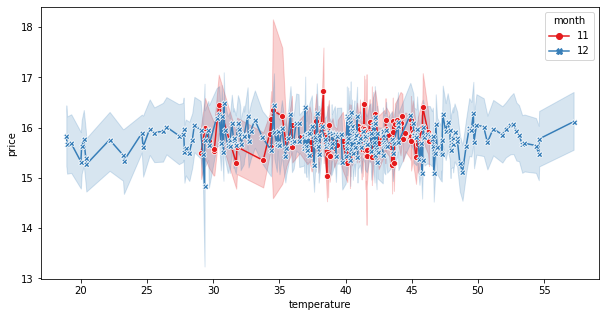

In [28]:
sns.lineplot(x ="temperature", y ="price", data = uber_df, hue='month', palette='Set1', markers=True, dashes=False, style='month')

From this plot we can conclude that there is a relationship but not a strong relationship between the price and temperature column.

Text(0.5, 1.0, 'Relation between hours of day and latitude of passenger')

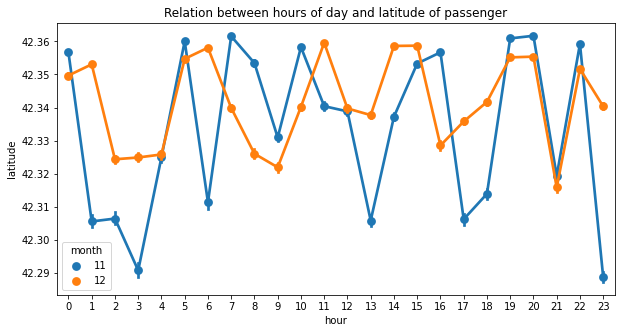

In [29]:
ax=sns.pointplot(x="hour",y="latitude", hue="month",data=uber_df)
ax.set_title('Relation between hours of day and latitude of passenger')

<h1>5. Feature Engineering</h1>
A feature is any measurable input that can be used in a predictive model to ceate outputs. Features are usually in the form of structured columns.<br>In order to make machine learning algorithms work well on new tasks, it might be necessary to design and train better features. So, that's why we need feature engineering.

<h4>Why is the importance of feature engineering?</h4>
<ul>
    <li>Preparing the input dataset so that it can be compatible with the ML algorithm.</li>
    <li>Improving the algorithms performance.</li>
</ul>

<h4>Common Feature Engineering Techniques Used</h4>
<ul>
    <li><b>One-hot encoding</b></li>
    <li><b>Feature Hashing</b></li>
    <li><b>Log Transformation</b></li>
    <li><b>Grouping Operations</b></li>
    
</ul>

<h3>I will perform 2 steps:</h3>
<ol>
    <li><b>One-hot encoding</b></li>
    <li><b>Feature selection</b></li>
</ol>

<h2>5.1. One-hot encoding (pandas get dummies)</h2>
This is one of the common encoding methods used in feature engineering. One-hot encoding is a method of assigning binary values (0’s and 1’s) to values in the columns. 

In [30]:
uber_df['Service_type'].value_counts()

UberXL       55096
WAV          55096
Black SUV    55096
Black        55095
UberX        55094
UberPool     55091
Name: Service_type, dtype: int64

In [31]:
uber_df['weather_condition'].value_counts()

 cloudy                  104013
 partly-cloudy-night      75244
 partly-cloudy-day        55202
 rain                     50216
 clear-night              28878
 clear-day                12725
 fog                       4290
Name: weather_condition, dtype: int64

In [32]:
# drop_first --> get k-1 dummies out of k categorical levels by removing the first level
# a dummy variable[a] is one that takes only the value 0 or 1
uber_df = pd.get_dummies(uber_df, drop_first=True)

In [33]:
uber_df.head()

,hour,day,month,price,distance,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,Service_type_Black SUV,Service_type_UberPool,Service_type_UberX,Service_type_UberXL,Service_type_WAV,weather_condition_ clear-night,weather_condition_ cloudy,weather_condition_ fog,weather_condition_ partly-cloudy-day,weather_condition_ partly-cloudy-night,weather_condition_ rain
0,22,30,11,12.0,1.11,42.3647,-71.0542,40.13,38.08,0.0000,0.00,0.60,3.38,3.99,1543554000,9.833,42.52,1543600800,31.71,1543658400,40.53,1543611600,28.06,1543658400,27.31,1017.16,281,1.00,0,9.833,281.8,1543578867,1543612470,0.79,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,10,13,12,16.0,1.11,42.3647,-71.0542,20.38,20.38,0.0000,0.00,0.66,2.94,3.22,1544738400,9.831,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,10.87,1031.51,2,0.03,0,9.831,327.3,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,19,13,12,7.5,1.11,42.3647,-71.0542,32.85,32.85,0.0000,0.00,0.56,2.65,3.83,1544738400,9.959,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,18.66,1033.65,76,0.64,0,9.959,330.8,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,23,16,12,7.5,1.11,42.3647,-71.0542,41.29,36.01,0.0567,0.94,0.86,8.30,8.30,1545015600,4.054,43.83,1544990400,34.25,1545044400,38.38,1544986800,28.30,1545044400,37.56,1012.72,57,1.00,0,4.054,325.3,1544962119,1544994839,0.30,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,0,14,12,26.0,1.11,42.3647,-71.0542,31.25,31.25,0.0000,0.00,0.64,2.62,3.54,1544738400,10.000,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,20.53,1035.06,173,0.91,0,10.000,326.7,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0


In [34]:
uber_df.shape

(330568, 77)

In [35]:
uber_df.dtypes

hour                                         int64
day                                          int64
month                                        int64
price                                      float64
distance                                   float64
                                            ...   
weather_condition_ cloudy                    uint8
weather_condition_ fog                       uint8
weather_condition_ partly-cloudy-day         uint8
weather_condition_ partly-cloudy-night       uint8
weather_condition_ rain                      uint8
Length: 77, dtype: object

<h1>5.2. Feature Selection</h1>
<ul>
    <li><b>Feature selection:</b> is the process of selecting a subset of relevant features or variables from the total features of a level in a data set to build machine learning algorithms.</li>
</ul>
<h4>The techniques for feature selection can be broadly classified into the following categories:</h4>
<ul>
    <li>Supervised techniques</li>
    <li>Unsupervised techniques</li>
</ul>
<h4>These techniques are classified as under:</h4>
<ul>
    <li>Filter methods</li>
    <li>Wrapper methods</li>
    <li>Embedded methods</li>
    <li>Hybrid methods</li>
</ul>
<h4> Let's see the Wrapper Methods:</h4>
<ul>
    <li>Wrapper feature selection methods create many models with different subsets of input features and select those features that result in the best performing model according to a performance metric.</li>
    <li>It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. </li>
    <li>These methods are unconcerned with the variable types, although they can be computationally expensive.</li>
    <li>The wrapper methods usually result in better predictive accuracy than filter methods.</li>
    <li><b>RFE</b> is a good example of a wrapper feature selection method.</li>
</ul>

<h2>Recursive Feature Elimination (RFE)</h2>
<ul>
    <li>Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm.</li>
    <li>RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.</li>
</ul>
<h4>RFE devided into 3 parts:</h4>
<ol>
    <li>Recursive Feature Elimination</li>
    <li>RFE With scikit-learn</li>
    <ul>
            <li>RFE for Classification</li>
            <li>RFE for Regression</li>
    </ul>
    <li>RFE Hyperparameters</li>
    <ul>
            <li>Explore Number of Features</li>
            <ul>
                <li>Automatically Select the Number of Features</li>
                <li>Which Features Were Selected</li>
            </ul>
            <li>Explore Base Algorithm</li>
    </ul>
</ol>

<h3>Load the necessary libraries</h3>

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE 

In [37]:
X = uber_df.drop('price', axis=1)
y = uber_df['price']
print(X.shape)
print(y.shape)
R_squared = {}

(330568, 76)
(330568,)


<h4>Model 1 : with 76 features<h4>

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
reg = LinearRegression()
reg = reg.fit(X_train, y_train)
reg.score(X_train, y_train)
R_squared['Feature_76'] = reg.score(X_test, y_test)

<h4>Model 2: with 60 features</h4>

In [40]:
rfe = RFE(reg, 60, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.


In [41]:
rfe.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
       False,  True, False,  True, False,  True,  True, False,  True,
        True, False,  True, False, False,  True,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [42]:
X_60 = X[X.columns[rfe.support_]]
X_60.head()

,day,month,distance,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,pressure,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,Service_type_Black SUV,Service_type_UberPool,Service_type_UberX,Service_type_UberXL,Service_type_WAV,weather_condition_ clear-night,weather_condition_ cloudy,weather_condition_ fog,weather_condition_ partly-cloudy-day,weather_condition_ partly-cloudy-night,weather_condition_ rain
0,30,11,1.11,42.3647,-71.0542,40.13,38.08,0.0000,0.00,0.60,3.38,3.99,42.52,31.71,40.53,28.06,27.31,1017.16,1.00,0,281.8,0.79,0.0003,28.79,42.52,26.41,40.53,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,13,12,1.11,42.3647,-71.0542,20.38,20.38,0.0000,0.00,0.66,2.94,3.22,33.83,27.27,32.85,24.61,10.87,1031.51,0.03,0,327.3,0.21,0.0001,18.29,33.83,13.79,32.85,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,13,12,1.11,42.3647,-71.0542,32.85,32.85,0.0000,0.00,0.56,2.65,3.83,33.83,27.27,32.85,24.61,18.66,1033.65,0.64,0,330.8,0.21,0.0001,18.29,33.83,13.79,32.85,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,16,12,1.11,42.3647,-71.0542,41.29,36.01,0.0567,0.94,0.86,8.30,8.30,43.83,34.25,38.38,28.30,37.56,1012.72,1.00,0,325.3,0.30,0.1252,39.22,43.83,33.98,38.38,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,14,12,1.11,42.3647,-71.0542,31.25,31.25,0.0000,0.00,0.64,2.62,3.54,33.83,27.27,32.85,24.61,20.53,1035.06,0.91,0,326.7,0.21,0.0001,18.29,33.83,13.79,32.85,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_60, y, test_size=0.3, random_state=10)
X_train.shape

(231397, 60)

In [44]:
# Creating a model
reg1 = LinearRegression()
# Fitting training data
reg1 = reg1.fit(X_train, y_train)
reg1.score(X_train, y_train)
R_squared['Feature_60'] = reg1.score(X_test, y_test)

<h4>Model 3: with 40 features</h4>

In [45]:
rfe = RFE(reg, 40, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 fe

In [46]:
X_40 = X[X.columns[rfe.support_]]
X_40.head()

,distance,longitude,precipIntensity,temperatureHigh,apparentTemperatureHigh,cloudCover,precipIntensityMax,temperatureMax,apparentTemperatureMax,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,Service_type_Black SUV,Service_type_UberPool,Service_type_UberX,Service_type_UberXL,Service_type_WAV,weather_condition_ cloudy,weather_condition_ fog,weather_condition_ partly-cloudy-day,weather_condition_ partly-cloudy-night,weather_condition_ rain
0,1.11,-71.0542,0.0000,42.52,40.53,1.00,0.0003,42.52,40.53,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,1.11,-71.0542,0.0000,33.83,32.85,0.03,0.0001,33.83,32.85,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1.11,-71.0542,0.0000,33.83,32.85,0.64,0.0001,33.83,32.85,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
3,1.11,-71.0542,0.0567,43.83,38.38,1.00,0.1252,43.83,38.38,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,1.11,-71.0542,0.0000,33.83,32.85,0.91,0.0001,33.83,32.85,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_40, y, test_size = 0.3, random_state = 10)
X_train.shape

(231397, 40)

In [48]:
# Creating a model
reg1 = LinearRegression()
# Fitting training data
reg1 = reg1.fit(X_train, y_train)
reg1.score(X_train, y_train)
R_squared['Feature_40'] = reg1.score(X_test, y_test)

In [49]:
R_squared

{'Feature_76': 0.9207912402582811,
 'Feature_60': 0.921107120589146,
 'Feature_40': 0.9211135407341601}

In [50]:
print("The highest is ",max(R_squared,key=R_squared.get), " And The minimum is",min(R_squared,key=R_squared.get))

The highest is  Feature_40  And The minimum is Feature_76


<h5>Since we have the highest R squared with 40 feature i will continue with this columns</h5>

In [51]:
X_40.columns

Index(['distance', 'longitude', 'precipIntensity', 'temperatureHigh',
       'apparentTemperatureHigh', 'cloudCover', 'precipIntensityMax',
       'temperatureMax', 'apparentTemperatureMax', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Beacon Hill',
       'destination_Boston University', 'destination_Fenway',
       'destination_Financial District', 'destination_Haymarket Square',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'Service_type_Black SUV',
       'Service_type_UberPool', 'Service_type_UberX', 'Service_type_UberXL',
       'Service_type_WAV', 'weather_condition_ cloudy ',
       

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_40, y, test_size = 0.2, random_state = 42) 
X_train.shape 

(264454, 40)

<h1>6. Model Selection</h1>

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

<h3>6.1. Decision Tree Regressor</h3>

In [54]:
decision = DecisionTreeRegressor(random_state = 0)  
decision.fit(X_train, y_train)
print("Decision Tree Accuracy: ", decision.score(X_test, y_test))

Decision Tree Accuracy:  0.9132992711042197


<h3>6.2. Random Forest Regressor</h3>

In [55]:
random = RandomForestRegressor(n_estimators=100, random_state=0)
random.fit(X_train, y_train)
print("Random Forest Accuracy: ", random.score(X_test, y_test))

Random Forest Accuracy:  0.9389463368203252


In [56]:
y_pred = random.predict(X_test)
y_pred[:5], y_test[:5]

(array([ 6.74554762,  7.44666667, 17.9865    , 19.51208333, 22.32568254]),
 1071       5.5
 75829      8.0
 248976    18.5
 57034     20.5
 74393     23.5
 Name: price, dtype: float64)

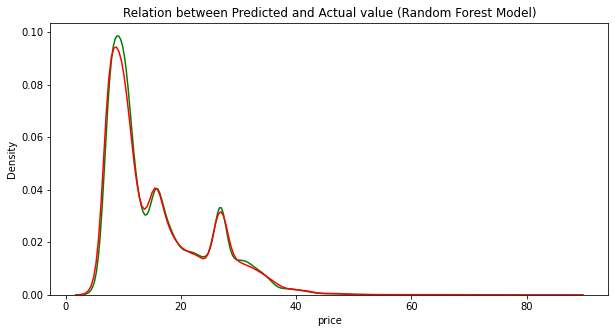

In [57]:
sns.kdeplot(y_pred, color="green")
sns.kdeplot(y_test, color="red")
plt.title("Relation between Predicted and Actual value (Random Forest Model)")
plt.show()

<h3>6.3. Gradiant Boosting Regressor</h3>

In [58]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 100, max_depth = 3) 
clf.fit(X_train, y_train)
print("Gradiant Boosting Accuracy: ", clf.score(X_test, y_test))
y_predict = clf.predict(X_test)
print(y_predict[:5]) 
print(y_test[:5]) 

Gradiant Boosting Accuracy:  0.9380966349028931
[ 7.2369795   7.57364263 18.6188237  18.39488322 20.78472305]
1071       5.5
75829      8.0
248976    18.5
57034     20.5
74393     23.5
Name: price, dtype: float64


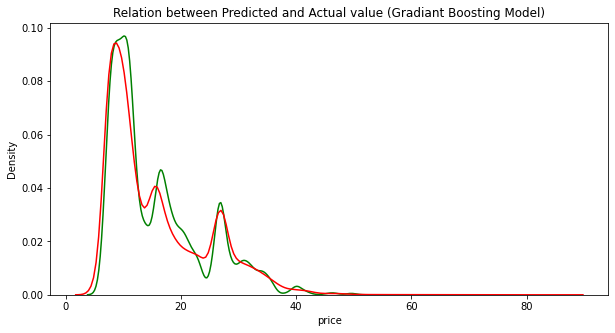

In [59]:
sns.kdeplot(y_predict, color="green")  # Gradiant Boosting prediction
sns.kdeplot(y_test, color="red")     # Actual Value
plt.title("Relation between Predicted and Actual value (Gradiant Boosting Model)")
plt.show()

Random Forest model prediction is more accurate (closer to the actual values) than the prediction of Gradiant Boosting model.

<h1>7. Testing</h1>
<ul>
    <li><h3>Mean Squared Error (MSE):</h3></li>
    <ul>
        <li>A metric that tells us the average squared difference between the predicted values and the actual values in a dataset. The lower the MSE, the better a model fits a dataset.</li>
        <h4>MSE = Σ(ŷi – yi)2 / n</h4>
        <h4>where:</h4>
        <ul>
            <li>Σ is a symbol that means “sum”</li>
            <li>ŷi is the predicted value for the ith observation</li>
            <li>yi is the observed value for the ith observation</li>
            <li>n is the sample size</li>
        </ul>
    </ul>
</ul>
<br>
<ul>
    <li><h3>Root Mean Squared Error (RMSE):</h3></li>
    <ul>
        <li>A metric that tells us the square root of the average squared difference between the predicted values and the actual values in a dataset. The lower the RMSE, the better a model fits a dataset.</li>
        <h4>RMSE = √Σ(ŷi – yi)2 / n</h4>
        <h4>where:</h4>
        <ul>
            <li>Σ is a symbol that means “sum”</li>
            <li>ŷi is the predicted value for the ith observation</li>
            <li>yi is the observed value for the ith observation</li>
            <li>n is the sample size</li>
        </ul>
    </ul>
</ul>

<h2>Testing:</h2>
is a statistical method used to estimate the skill of machine learning models on new data.
<ol>
    <li><h4>K fold Cross Validation:</h4></li>
    <ul>
        <li>K fold Cross Validation is a statistical method used to estimate the skill of machine learning models on new data.</li>
        <li><b>The general procedure is as follows:</b></li>
        <ol>
            <li>Shuffle the dataset randomly.</li>
            <li>Split the dataset into k groups</li>
            <li>For each unique group:</li>
            <ol>
                <li>Take the group as a hold out or test data set.</li>
                <li>Take the remaining groups as a training data set</li>
                <li>Fit a model on the training set and evaluate it on the test set</li>
                <li>Retain the evaluation score and discard the model</li>
            </ol>
            <li>Summarize the skill of the model using the sample of model evaluation scores</li>
        </ol>
    </ul>
    <li><h4>Testing For Random Forest Regressor & Gradiant Boosting Regressor</h4></li>
</ol>

* <b>Difference in KFold and ShuffleSplit output</b> <br>
    * KFold will divide your data set into prespecified number of folds, and every sample must be in one and only one fold.<br>
    * ShuffleSplit will randomly sample your entire dataset during each iteration to generate a training set and a test set.

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
mse = cross_val_score(LinearRegression(),X_test,y_test,cv=cv , scoring='neg_mean_squared_error')
print(mse)
print(' Mean of All Folds  is',mse.mean() )

[-5.97658312 -5.75769404 -5.69086547 -5.51268916 -5.61090097]
 Mean of All Folds  is -5.709746550807628


MAE :   1.3039658270619743
MSE :   4.41942086698282
RMAE :   2.102241866908473


Text(0, 0.5, 'Predicted  Price ')

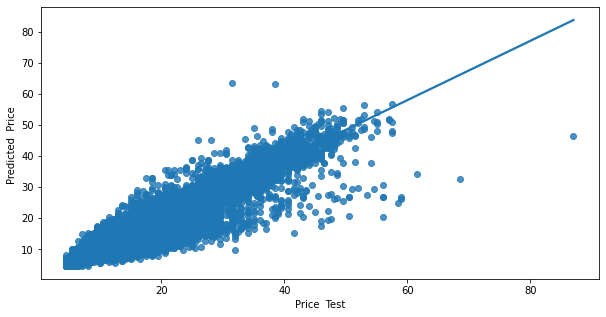

In [61]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred))) 
sns.regplot(y_test,y_pred)
plt.xlabel('Price  Test')
plt.ylabel('Predicted  Price ')

MAE :   1.3573291370708043
MSE :   4.480927256428509
RMAE :   2.1168200812606885


Text(0, 0.5, 'Predicted  Price ')

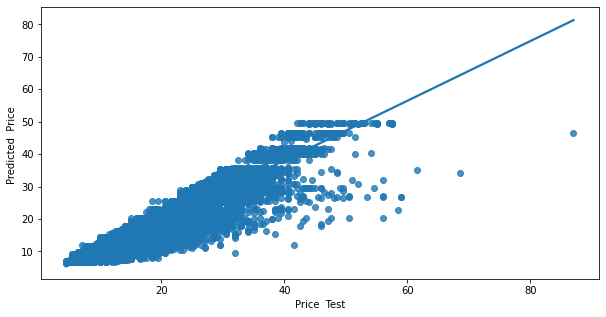

In [62]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_predict))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_predict))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_predict))) 

sns.regplot(y_test,y_predict)
plt.xlabel('Price  Test')
plt.ylabel('Predicted  Price ')